## 1.
Perform combined over and undersampling on the diabetes dataset (use SMOTEENN). Explain how combined sampling works.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = diabetes_df.drop('Outcome',axis = 1)
y = diabetes_df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

#Standardize
sc = StandardScaler()
X_train_scaler = sc.fit_transform(X_train)
X_test_scaler = sc.fit_transform(X_test)

In [27]:
from imblearn.combine import SMOTEENN
sme = SMOTEENN(random_state=42)
X_res, y_res = sme.fit_resample(X_train_scaler, y_train)

In [28]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_res, y_res)

LogisticRegression(random_state=42)

In [29]:
from sklearn.metrics import balanced_accuracy_score
y_pred = model.predict(X_test_scaler)
balanced_accuracy_score(y_test, y_pred)

0.7088888888888889

## 2.
Comment on the performance of combined sampling vs the other approaches we have used for the diabetes dataset.

The accuracy score of the combines sampling turned out to be slightly lower that the score for just oversampling on this dataset. However, compared to all other approaches we used, it's pretty high.

## 3.
What is outlier detection? Why is it useful? What methods can you use for outlier detection?

Outliers are extreme values that deviate from other observations on data. An outlier is an observation that diverges from an overall pattern on a sample. Outlier Analysis is a process that involves identifying the anomalous observation in the dataset. 
Anomaly/outliers detection is an important tool for detecting fraud, network intrusion, and other rare events that may have great significance but are hard to find.

Some of the most popular outliers detection methods are:

* Z-Score or Extreme Value Analysis (parametric)

* Probabilistic and Statistical Modeling (parametric)

* Linear Regression Models (PCA, LMS)

* Proximity Based Models (non-parametric)

* Information Theory Models

* High Dimensional Outlier Detection Methods (high dimensional sparse data)

## 4.
Perform a linear SVM to predict credit approval (last column) using this dataset: https://archive.ics.uci.edu/ml/datasets/Statlog+%28Australian+Credit+Approval%29 . Make sure you look at the accompanying document that describes the data in the dat file. You will need to either convert this data to another file type or import the dat file to python. 
You can use this code, but otherwise you follow standard practices we have already used many times.

In [42]:
credit_df = pd.read_table("australian.dat", sep=" ",header=None)
credit_df[14]

0      0
1      0
2      0
3      1
4      1
      ..
685    1
686    0
687    1
688    1
689    1
Name: 14, Length: 690, dtype: int64

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = credit_df.drop(14,axis = 1)
y = credit_df[14]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [45]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear')
classifier.fit(X,y)

SVC(kernel='linear')

In [46]:
from sklearn.metrics import balanced_accuracy_score
y_pred = classifier.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.8356397700659997

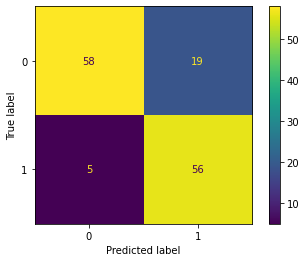

In [50]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test)

## 5.
How did the SVM model perform? Use a classification report.

In [51]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.92      0.75      0.92      0.83      0.83      0.68        77
          1       0.75      0.92      0.75      0.82      0.83      0.70        61

avg / total       0.84      0.83      0.85      0.83      0.83      0.69       138



The model performed very well. We can see that looking at f1 score and also at an accuracy score which is 0.83.

## 6. 
What kinds of jobs in data are you most interested in? Do some research on what is out there. Write about your thoughts in under 400 words.

I’ll be most interested to use sequel, python to manipulate data and then visualize it and make look pretty. I love the process of reverse engineering, specifically figuring out how to manipulate the data in a way for it to look exactly as I want it to look to create most valuable visuals out of it. 

I also really like the process of looking at a lot of messy data and then condensing it to just the information and data points I need. This feeling is very satisfying for me, turning something big and messy into something short,clear, and valuable. And then, when the data is clean, it’s super interesting to brainstorm different assumptions about this data and test it in practice; figuring out how to analyze the data in a way that could answer my question or confirm or disprove my hypothesis about the dataset.

I love that this kind of work gives you space to be both creative and analytical, I always wanted to use both of these skills in whatever I do.

#### Here are some data science jobs that I found that align well with what I enjoy doing:

* <b>Business Intelligence Analyst</b> — their main job is to find patterns in data and it’s value for the particular company or industry

* <b>Data Analyst</b> - analyze company and industry data to find value and opportunities. This one is kind of similar to the BI Analyst job.

* <b>Data Scientist</b> - data scientists collect and analyze data and communicate actionable insights. Based on my research, this role resembles the Data Analyst role a lot but is one level technically above it. It requires stronger coding skills and the ability to understand data from a more informed perspective to help make predictions.

* <b>Data Engineer</b> - this role might focus on the process of capturing data to make an acquisition pipeline more efficient. They may also need to upgrade a database infrastructure for faster queries. 

* <b>Data Analytics Consultant</b> - the primary role of an analytics consultant is to deliver insights to a company to help their business. The difference between an in-house data analyst or scientist and this role is that a consultant may work for different companies in a shorter period of time.

* <b>Operations Analyst</b> — they  focus on the internal processes of a business. This can include internal reporting systems, product manufacturing and distribution, and the general streamlining of business operations. They analyze it and derive meaninful insights from it that later can be used to improve the systems and processes used at the company.